In [3]:
import pandas as pd

df = pd.read_csv('Global_Cybersecurity_Threats_2015-2024.csv')


In [4]:
import numpy as np

financial_loss = df['Financial Loss (in Million $)'].values
affected_users = df['Number of Affected Users'].values

print("Financial Loss (NumPy):", financial_loss[:5])
print("Affected Users (NumPy):", affected_users[:5])


Financial Loss (NumPy): [80.53 62.19 38.65 41.44 74.41]
Affected Users (NumPy): [773169 295961 605895 659320 810682]


In [5]:
print("Mean Financial Loss:", np.mean(financial_loss))
print("Max Affected Users:", np.max(affected_users))
print("Min Affected Users:", np.min(affected_users))
print("Standard Deviation (Financial Loss):", np.std(financial_loss))


Mean Financial Loss: 50.49297
Max Affected Users: 999635
Min Affected Users: 424
Standard Deviation (Financial Loss): 28.786616251522744


In [6]:
high_impact = affected_users > 500000
print("Number of high impact attacks:", np.sum(high_impact))


Number of high impact attacks: 1513


In [7]:
resolution_times = df['Incident Resolution Time (in Hours)'].values
resolution_plus10 = resolution_times + 10

print("Resolution time after +10 hrs:", resolution_plus10[:5])


Resolution time after +10 hrs: [73 81 30 17 78]


In [8]:
features_np = np.column_stack((financial_loss, affected_users))

print("Shape of combined array:", features_np.shape)
print("First 5 rows:\n", features_np[:5])


Shape of combined array: (3000, 2)
First 5 rows:
 [[8.05300e+01 7.73169e+05]
 [6.21900e+01 2.95961e+05]
 [3.86500e+01 6.05895e+05]
 [4.14400e+01 6.59320e+05]
 [7.44100e+01 8.10682e+05]]


In [9]:
print("Transposed shape:", features_np.T.shape)

dot_product = np.dot(features_np.T, features_np)
print("Dot Product Matrix:\n", dot_product)


Transposed shape: (2, 3000)
Dot Product Matrix:
 [[1.01346279e+07 7.64937344e+10]
 [7.64937344e+10 1.01623688e+15]]


In [10]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nInfo:")
print(df.info())


Shape: (3000, 10)
Columns: ['Country', 'Year', 'Attack Type', 'Target Industry', 'Financial Loss (in Million $)', 'Number of Affected Users', 'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used', 'Incident Resolution Time (in Hours)']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type     

In [11]:
print("Missing Values:\n", df.isna().sum())
print("\nDescriptive Stats:\n", df.describe(include='all'))


Missing Values:
 Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

Descriptive Stats:
        Country         Year Attack Type Target Industry  \
count     3000  3000.000000        3000            3000   
unique      10          NaN           6               7   
top         UK          NaN        DDoS              IT   
freq       321          NaN         531             478   
mean       NaN  2019.570333         NaN             NaN   
std        NaN     2.857932         NaN             NaN   
min        NaN  2015.000000         NaN             NaN   
25%        NaN  2017.000000         NaN             NaN   
50%     

In [12]:
df_clean = df.dropna()
print("Missing values after cleaning:\n", df_clean.isna().sum())


Missing values after cleaning:
 Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64


In [13]:
print(df_clean.groupby('Attack Type').describe())


                    Year                                                 \
                   count         mean       std     min     25%     50%   
Attack Type                                                               
DDoS               531.0  2019.472693  2.863681  2015.0  2017.0  2019.0   
Malware            485.0  2019.591753  2.881677  2015.0  2017.0  2020.0   
Man-in-the-Middle  459.0  2019.531590  2.880552  2015.0  2017.0  2020.0   
Phishing           529.0  2019.527410  2.891947  2015.0  2017.0  2020.0   
Ransomware         493.0  2019.711968  2.855995  2015.0  2017.0  2020.0   
SQL Injection      503.0  2019.594433  2.781292  2015.0  2017.0  2020.0   

                                  Financial Loss (in Million $)             \
                      75%     max                         count       mean   
Attack Type                                                                  
DDoS               2022.0  2024.0                         531.0  52.035631   
Malware     

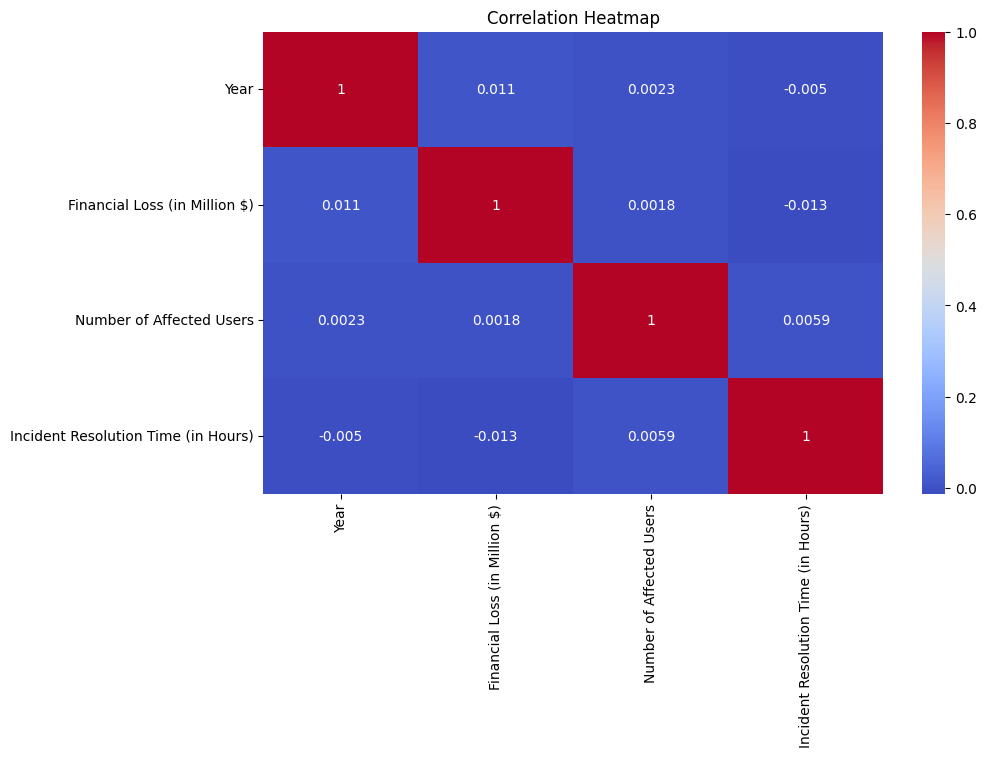

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


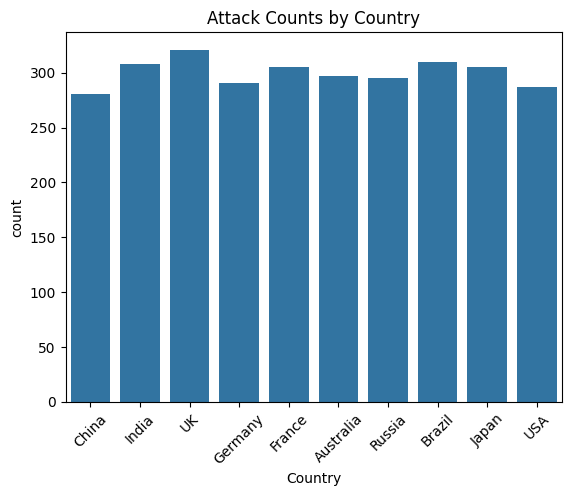

In [15]:
sns.countplot(x='Country', data=df_clean)
plt.title("Attack Counts by Country")
plt.xticks(rotation=45)
plt.show()


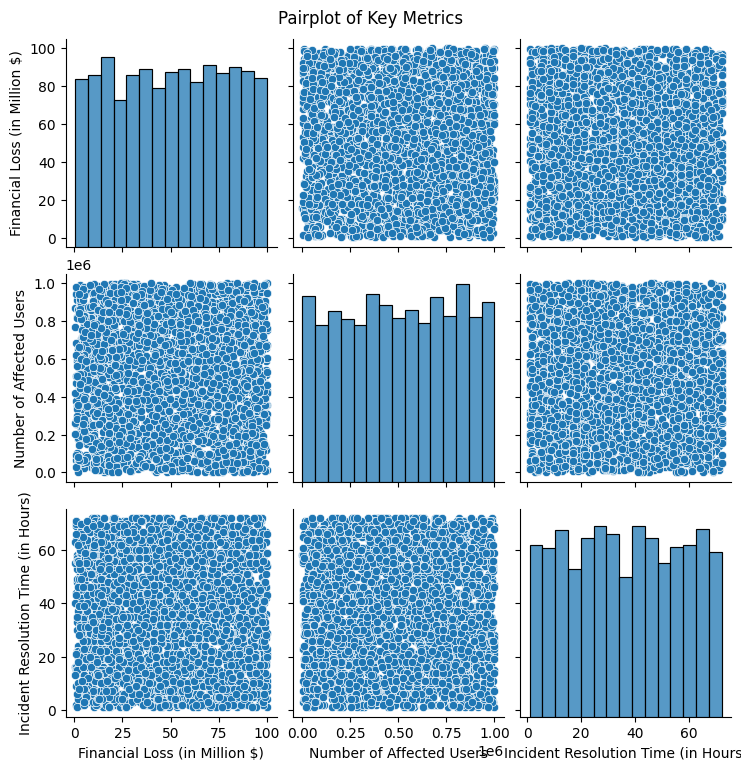

In [16]:
sns.pairplot(df_clean[[
    'Financial Loss (in Million $)',
    'Number of Affected Users',
    'Incident Resolution Time (in Hours)'
]])
plt.suptitle("Pairplot of Key Metrics", y=1.02)
plt.show()


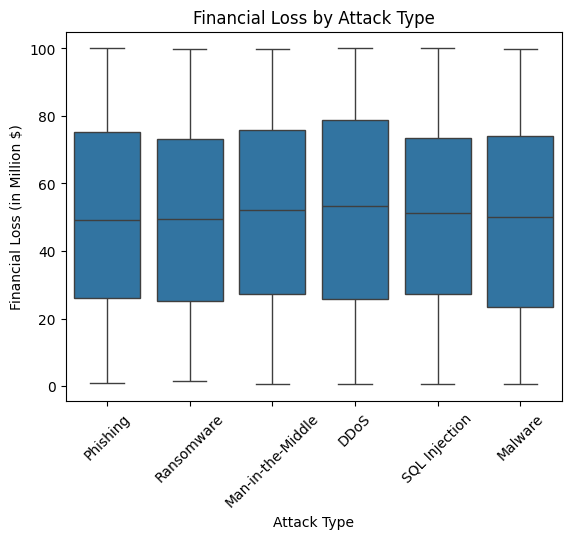

In [17]:
sns.boxplot(x='Attack Type', y='Financial Loss (in Million $)', data=df_clean)
plt.title("Financial Loss by Attack Type")
plt.xticks(rotation=45)
plt.show()


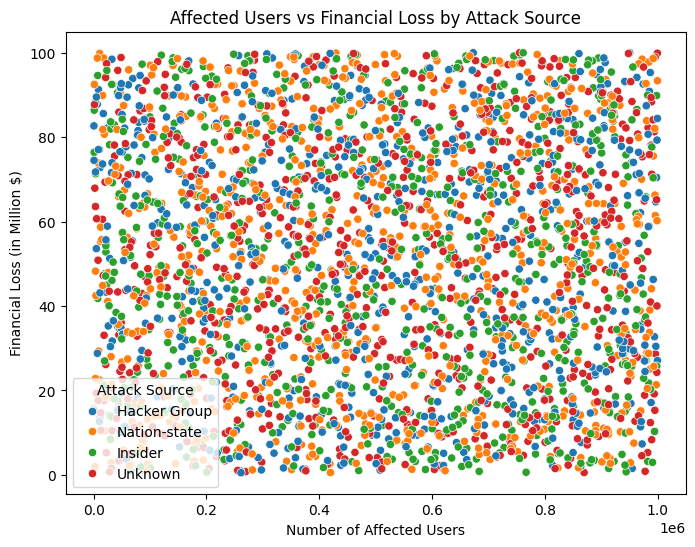

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Number of Affected Users',
    y='Financial Loss (in Million $)',
    hue='Attack Source',
    data=df_clean
)
plt.title("Affected Users vs Financial Loss by Attack Source")
plt.show()


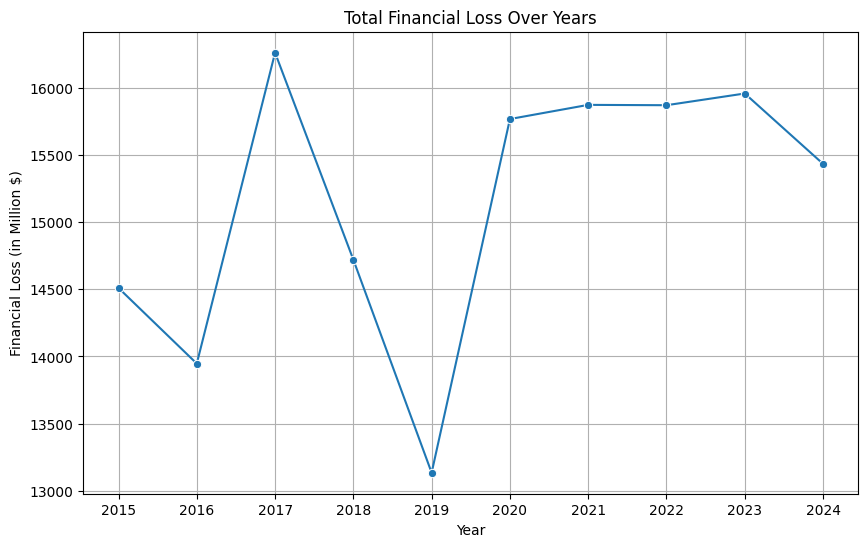

In [19]:
yearly_loss = df_clean.groupby('Year')['Financial Loss (in Million $)'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Financial Loss (in Million $)', data=yearly_loss, marker='o')
plt.title("Total Financial Loss Over Years")
plt.xticks(yearly_loss['Year'].unique())
plt.grid(True)
plt.show()


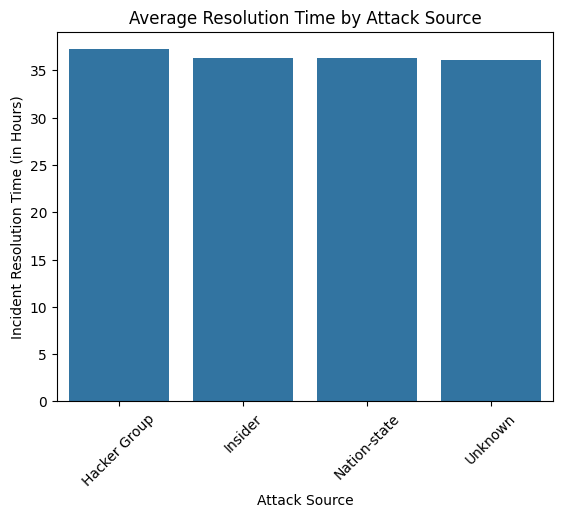

In [20]:
avg_resolution = df_clean.groupby('Attack Source')['Incident Resolution Time (in Hours)'].mean().reset_index()

sns.barplot(x='Attack Source', y='Incident Resolution Time (in Hours)', data=avg_resolution)
plt.title("Average Resolution Time by Attack Source")
plt.xticks(rotation=45)
plt.show()


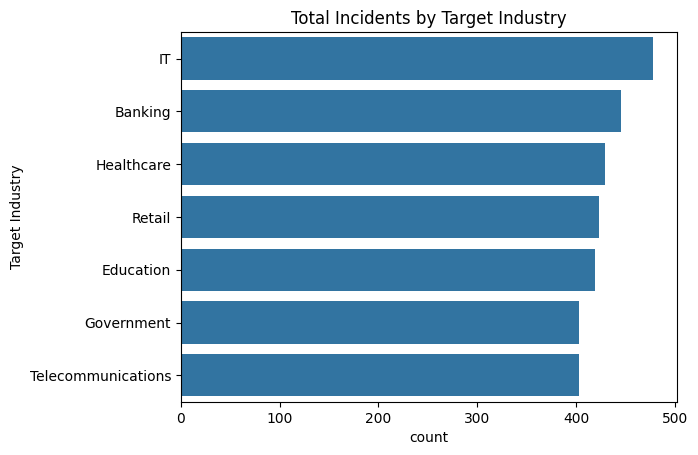

In [21]:
sns.countplot(y='Target Industry', data=df_clean, order=df_clean['Target Industry'].value_counts().index)
plt.title("Total Incidents by Target Industry")
plt.show()


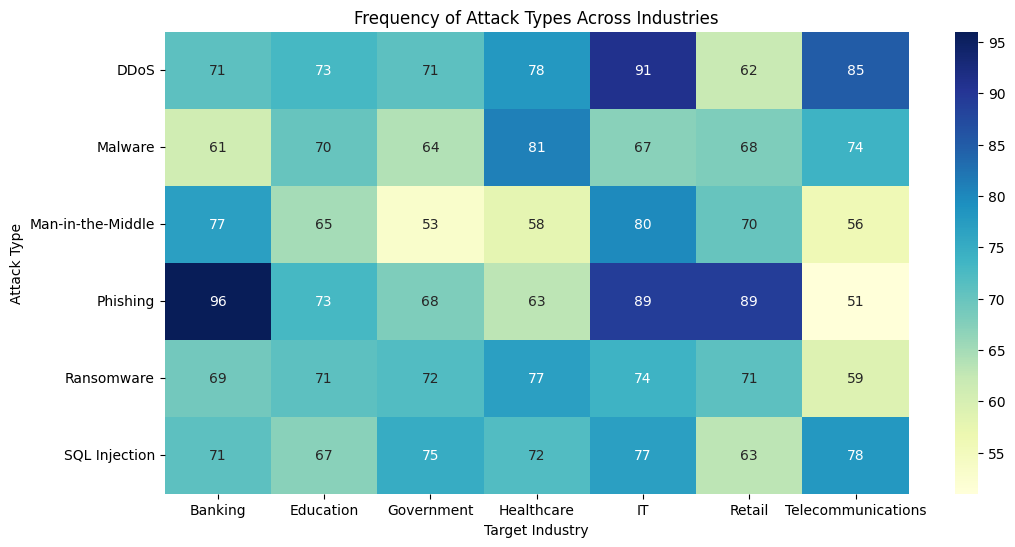

In [22]:
pivot = df_clean.pivot_table(index='Attack Type', columns='Target Industry', aggfunc='size', fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Frequency of Attack Types Across Industries")
plt.show()
